In [1]:
# Emily Lewis
# OCNG 689
# March 1 due
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import datetime as dt

In [2]:
# 1 Basic Line Plotting

f = open('../python4geosciences/data/merrimack_discharge.dat')
y={}
line = f.readlines()
for i in range(1923,2005):
    Y=str(i)
    y[Y]=[]
    for l in line:
        data=l.split('\t')
        if not data: continue
        if len(data)<3: continue
        elif data[2].split('-')[0]==str(i):
            y[Y].append(float(data[3])*0.0283168)

In [3]:
mean = []
std = []

for d in range(0,365):
    a=0
    arr=[]
    for i in range(1924,2004):
        a+=y[str(i)][d]
        arr.append(y[str(i)][d])
    mean.append(a/len(range(1924,2004)))
    std.append(np.std(arr))

up=np.array(mean) + np.array(std)
down=np.array(mean) - np.array(std)



In [4]:
def Merrimack(year_wanted):
    year_wanted = str(year_wanted)
    discharge = []
    f.seek(0)
    for value in f.readlines():
        value = value.split()
        if value[0] == 'USGS':
            years = value[2].split('-')[0]
            if years == year_wanted:
                d = np.float(value[3])
                discharge.append(d) 
    return discharge

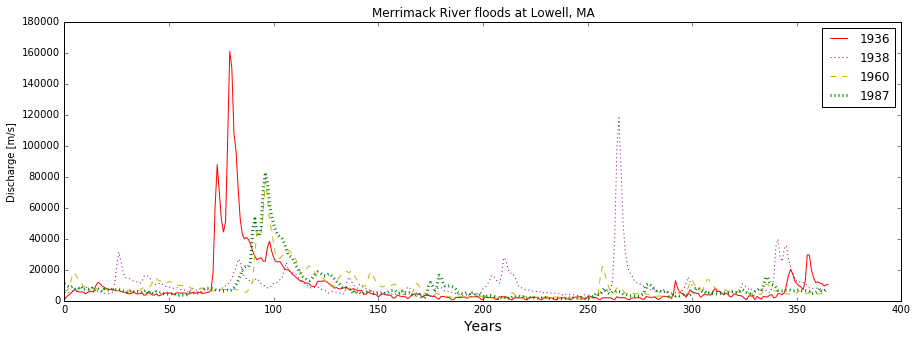

In [5]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111) 

ax.set_xlabel('Years', fontsize=14)
ax.set_ylabel('Discharge [m/s]')
ax.set_title('Merrimack River floods at Lowell, MA')
ax.plot(Merrimack(1936),'r', label='1936')
ax.plot(Merrimack(1938),'purple', linestyle = ':', label='1938')
ax.plot(Merrimack(1960),'y--', label='1960')
ax.plot(Merrimack(1987),'g', linestyle = ':', linewidth = '3', label='1987')

ax.legend()

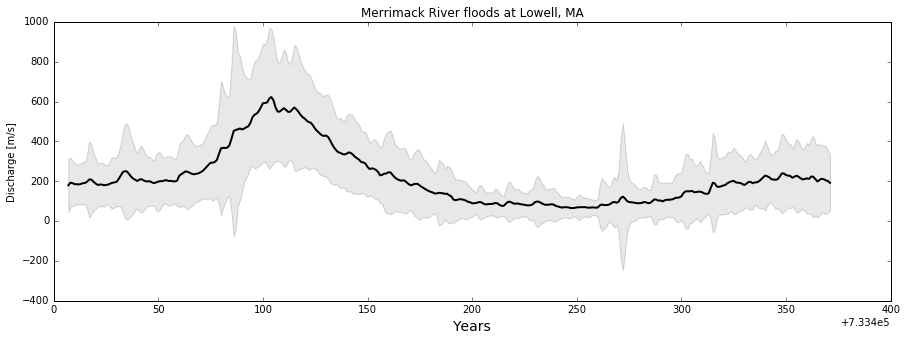

In [6]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)  

date1_1 = dt.datetime(2008, 12, 31)
date1_2 = dt.datetime(2009, 12, 31)
delta1 = dt.timedelta(days=1)
ax.set_xlabel('Years', fontsize=14)
ax.set_ylabel('Discharge [m/s]')
ax.set_title('Merrimack River floods at Lowell, MA')
dates1 = mpl.dates.drange(date1_1, date1_2, delta1)
ax.plot(dates1, mean,color='k',linewidth = 2, label='mean')
ax.fill_between(dates1,up,down,alpha=0.5,edgecolor='darkgrey',facecolor='lightgrey')



In [7]:
# numbers going into the list
# np.asarray


# fig = plt.figure(figsize = (18,2))
# ax = fig.add_subplot(1,1,1)
# for yr in [1936,1938,1960,1987]:
#     ax.plot(Merrimack(yr))




# # calculating the mean
# # data = [Merrimack(1936), Merrimack(1937), Merrimack(1960), Merrimack(1987)]
# # mean = np.mean(data)
# # sum(data) / float(len(data))

# # data = [Merrimack(1936), Merrimack(1937), Merrimack(1960), Merrimack(1987)]
# # print(data)
# # mean = []
# # for value in data:
# #     find = sum(value) / float(length(value))
# #     mean.append(find)
# # return mean

# # y = np.asarray(data).mean()





In [8]:
# a = 0
# mean = []
# for i in range(0, len(z)):
#     a+=np.float(z[i])
# a/len(z)

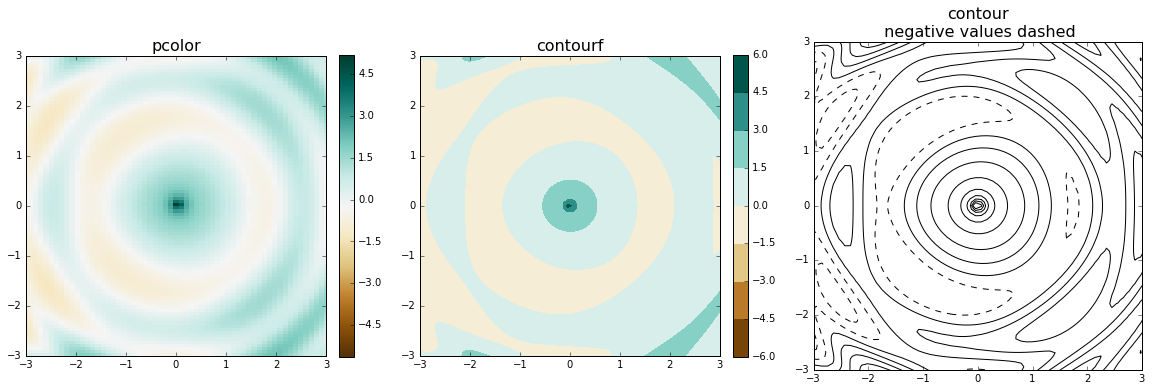

In [9]:
#2 Plot 2D function in multiple ways
X, Y = np.meshgrid(np.linspace(-4.2, 6.2, 101), np.linspace(-3.2, 3.2, 101))
Z = np.cos(X**2+Y**2)*(X**2+Y**2)**-0.25 + 0.2*X*Y*np.sin(Y) \
    + 0.01*X*Y**4*np.sin(X) + 0.2*np.exp(-Y**2)

# pcolor
# contourf
# contour (with dashed lines for negative values, solid lines for positive values)

fig = plt.figure(figsize=(20,8))

ax1 = fig.add_subplot(1, 3, 1, aspect='equal')
first = ax1.pcolor(X, Y, Z, cmap='BrBG')  

ax1.set_xlim(-3,3)
ax1.set_ylim(-3,3)
ax1.set_title('pcolor', fontsize = 16)
fig.colorbar (first, fraction=0.046, pad=0.04)

ax2 = fig.add_subplot(1, 3, 2, aspect='equal')
second = ax2.contourf(X, Y, Z, cmap='BrBG')  
ax2.axis([X.min(), X.max(), Y.min(), Y.max()])
ax2.set_xlim(-3,3)
ax2.set_ylim(-3,3)
ax2.set_title('contourf', fontsize=16)
fig.colorbar (second, fraction=0.046, pad=0.04) 

levels = np.arange(-5,4.5,.5)


ax3 = fig.add_subplot(1, 3, 3, aspect='equal')
ax3.set_xlim(-3,3)
ax3.set_ylim(-3,3)
ax3.set_title('contour\n negative values dashed', fontsize=16)

plt.rcParams['contour.negative_linestyle'] = 'dashed'
plot = plt.contour(X, Y, Z, colors = 'k', levels = levels)  

# ax3.axis([X.min(), X.max(), Y.min(), Y.max()])

# fig.colorbar (plot)
# plt.show()

(20.943761978900973,
 22.178587952142777,
 20.033430311790905,
 31.985529676521821)

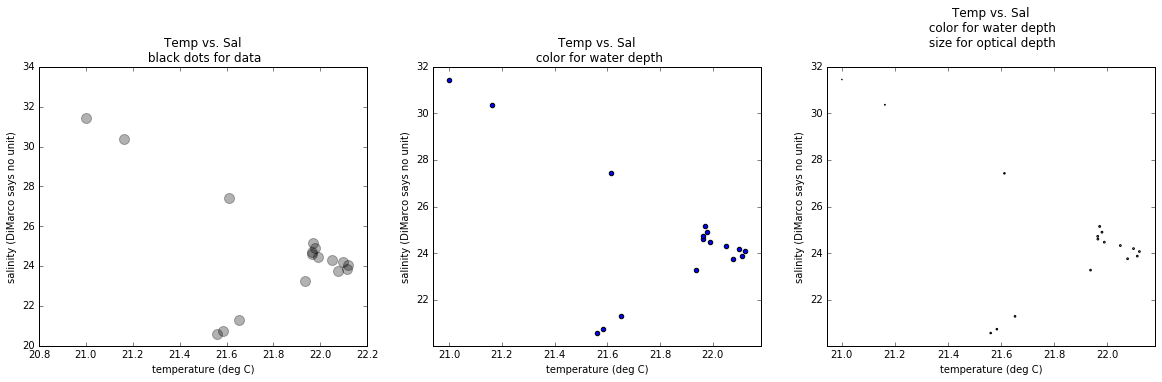

In [10]:
#3 Read 2D data and make scatter plot

# plot temperature vs. salinity, using black dots to mark the data points.
# plot temperature vs. salinity, and color the markers with the depth;
# plot temperature vs. salinity, color the markers with the depth, and 
#     then size the markers with another property of your choice from the file.


# * Column  1: Pressure (Digiquartz, db)
# * Column  2: Depth (salt water, meters)
# * Column  3: Temperature (ITS-90, deg C)
# * Column  6: Salinity (PSS-78 psu)
# * Column  9: Dissolved Oxygen (SBE 43 volts)

STdata = np.loadtxt('../python4geosciences/data/MCH/m1001a.cnv2', comments='*',skiprows=45)

temp = STdata[:,2]
sal = STdata[:,5]
depth = STdata[:,1]
do = STdata[:,10]

fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(1,3,1)
ax1.set_title('Temp vs. Sal\n black dots for data')
plot1 = ax1.scatter(temp,sal,s=100,c='k',alpha=.3)
ax1.set_xlabel('temperature (deg C)')
ax1.set_ylabel('salinity (DiMarco says no unit)')
ax2.axis('tight')

ax2 = fig.add_subplot(1,3,2)
ax2.set_title('Temp vs. Sal\n color for water depth')
plot2 = ax2.scatter(temp,sal, cmap = 'BrBG', alpha=1)
ax2.set_xlabel('temperature (deg C)')
ax2.set_ylabel('salinity (DiMarco says no unit)')
# cbar = plt.colorbar(plot2)
ax2.axis('tight')

ax3 = fig.add_subplot(1,3,3)
plot3 = ax3.scatter(temp,sal,s=do, c=depth, cmap = 'BrBG', alpha=1)
ax3.set_title('Temp vs. Sal\n color for water depth\n size for optical depth\n')
ax3.set_xlabel('temperature (deg C)')
ax3.set_ylabel('salinity (DiMarco says no unit)')
ax3.axis('tight')


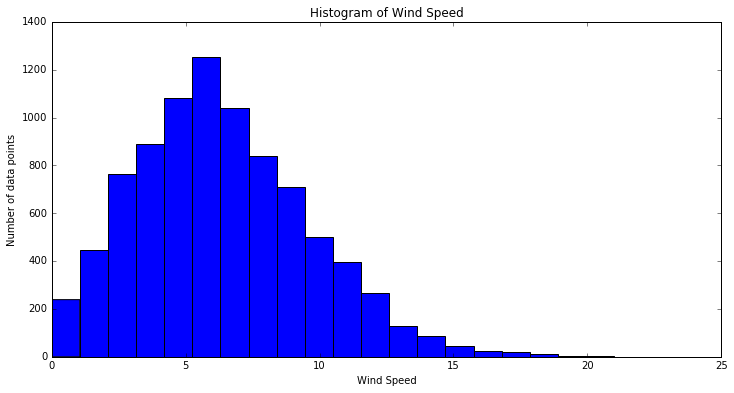

In [11]:
#4 Histogram

burl = np.genfromtxt('http://www.ndbc.noaa.gov/view_text_file.php?filename=burl1h2010.txt.gz&dir=data/historical/stdmet/')
wind_speed = burl[:, 6]

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,1,1)
ax1.hist(wind_speed, bins=20)

ax1.set_xlabel('Wind Speed')
ax1.set_ylabel('Number of data points')
ax1.set_title('Histogram of Wind Speed')

# BONUS???

[  1.21983773e-02  -4.69701922e+01   4.55160421e+04]


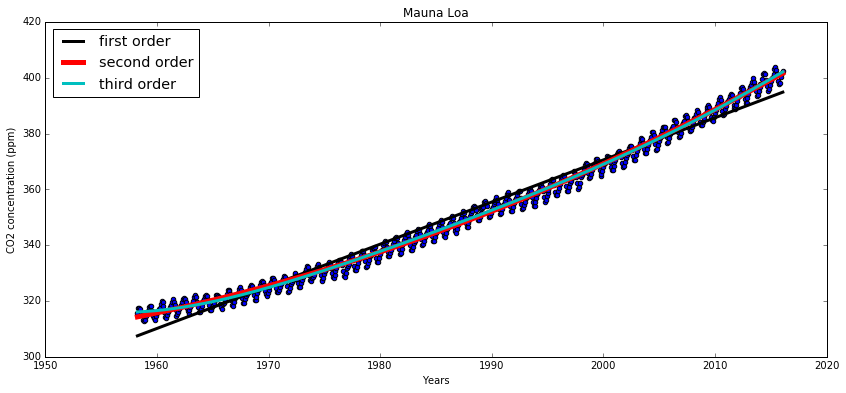

In [12]:
#5 Fit and line and plot

mauna_loa_co2 = np.genfromtxt('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt')
years = mauna_loa_co2[:, 0]
months = mauna_loa_co2[:, 1]
co2 = mauna_loa_co2[:, 4]

date = years + months/12

fig = plt.figure(figsize = (14,6))
ax1 = fig.add_subplot(111)
plt.scatter(date, co2)

ax1.set_title('Mauna Loa')
ax1.set_xlabel('Years')
ax1.set_ylabel('CO2 concentration (ppm)')


# 1st
first = np.polyfit(date,co2,1)
# print(first)
# ax3 = fig.add_subplot(1)
# plt.contour(years, co2)  # use the gray colormap to look more realistic
y1 = first[0]*date + first[1]

plt.plot(date,y1,'k',linewidth = '3',label='first order')

# 2nd
second = np.polyfit(date,co2,2)
print(second)

y2 = second[0]*date**2 + second[1]*date**1 + second[2]
plt.plot(date,y2,'r',linewidth = '5',label='second order')

# 5th
fifth = np.polyfit(date,co2,5)
# print(fifth)
y3 = fifth[0]*date**5 + fifth[1]*date**4 + fifth[2]*date**3 + fifth[3]*date**2 + fifth[4]*date + fifth[5]
plt.plot(date,y3,'c', linewidth = '3',label='third order')

ax1.legend(loc=2, fontsize = 'x-large')

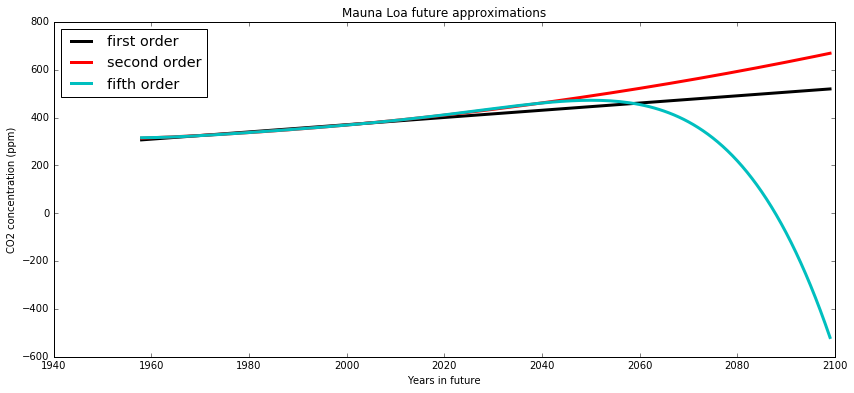

In [13]:
# Looking at the future 2100
fig = plt.figure(figsize = (14,6))
ax1 = fig.add_subplot(111)
# plt.scatter(date, co2)

ax1.set_title('Mauna Loa future approximations')
ax1.set_xlabel('Years in future')
ax1.set_ylabel('CO2 concentration (ppm)')

future = np.arange(1958,2100,1)
# print(future)
y11 = first[0]*future + first[1]
# print(y11)
y22 = second[0]*future**2 + second[1]*future**1 + second[2]

y33 = fifth[0]*future**5 + fifth[1]*future**4 + fifth[2]*future**3 + fifth[3]*future**2 + fifth[4]*future + fifth[5]

plt.plot(future, y11,'k',linewidth = '3',label='first order')
plt.plot(future, y22,'r',linewidth = '3',label='second order')
plt.plot(future, y33,'c',linewidth = '3',label='fifth order')

ax1.legend(loc=2, fontsize = 'x-large')
# The second polynomial is the best option for predicting to the future. 
# It is very unlikely that the CO2 will become negative in the future (fifth).
# It is not expected to increase linearly

IndexError: index 2003 is out of bounds for axis 0 with size 100

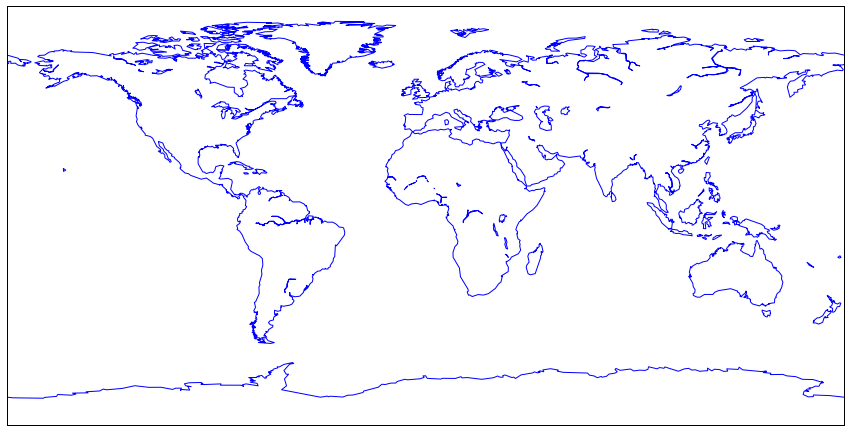

In [14]:
# 6

lat, lon, sst = np.load('../python4geosciences/data/surface_temp_predictions.npz', encoding='latin1')['arr_0']
# some representation of the earth (like coastlines), includes a colorbar,

from mpl_toolkits.basemap import Basemap


for pic in range(100):
    fig = plt.figure(figsize=(15,12))
    ax = fig.add_subplot(111)
    m = Basemap(projection = 'cyl')    
    m.drawcoastlines(color='blue')
    X,Y = (np.meshgrid(lon,lat))
    bar=ax.pcolormesh(X,Y,sst[i],cmap='BrBG')
    cb=plt.colorbar(bar,orientation='horizontal')
    ax.set_title('Surface Temperature' +str(i),fontsize=16)
    m.drawmeridians(np.arange(0,360,30),labels=[False, False, False, True])
    m.drawparallels(np.arange(-90,90,30),labels=[True, False, False, False])
    cb.set_label('Temperature')
    plt.savefig('temperature_%03d.png' %i)
    
    
#     ax1.pcolor(X, Y, Z, cmap='BrBG') 
# # frame_name = 'frame_%03d' % frame_number


# # fig = plt.figure(figsize=(12,6))
# # plt.plot(lat,sst)

# # print(shape(lat)
# print(lon.shape)
# print(lat.shape)
# print(sst.shape)
# print(sst[0,:,:])
# type(lon)

# plt.savefig('SST_%03d.png')

In [ ]:

# duh = lon[:,None].T.shape
# # lon.shape
# duhhh= lat[None,None,:].shape
# print(sst.shape)

plt.pcolormesh(lat,lon,sst[99,:,:])

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, axis_bgcolor='azure')

m.fillcontinents(color='green')
# m.drawmeridians(np.arange(-100, -65, 5), labels=[0, 0, 0, 1])
# m.drawparallels(np.arange(15, 40, 5), labels=[1, 0, 0, 0])
# m.drawrivers(color='darkblue')  # this one is slow...
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
m.drawcoastlines()
